# Heart attack prediction
We have a dataset of **Coronary angiography** patients.

It's a medical imaging technique used to visualize the inside of blood vessels and organs of the body, with particular interest in the arteries, veins, and the heart chambers; that can visualize coronary artery stenosis which is an abnormal narrowing in a blood vessel.

An abnormal diameter narrowing of more than 50% is associated with a very high risk of heart attack.

Our goal is to build a classification model to predict if a patient has an abnormal narrowing without doing the arteriography.

## Initial consideration about the data

The dataset that we have is from people who went to the hospital for an arteriography because they needed it or for a check.

We do not have healthy patients that also made this just for data collection, but just the patients that are inclined to have heart disease. So the dataset is biased. 

We will see some examples and effect in the notebook and we must be very careful during the model validation phase.

During the data visualization phase we may encounter contro-intuitive discovery that we may have to explain without taking hasty conclusions.

## Exploratory Data Analysis

We start with exploratory data analysis to understand the data that we are working with, but first we will need to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Let's import the dataset and see the columns and their data types

In [2]:
heart = pd.read_csv("Data/heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trtbps    301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalachh  301 non-null    int64  
 8   exng      301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slp       301 non-null    int64  
 11  caa       301 non-null    int64  
 12  thall     301 non-null    int64  
 13  output    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.1 KB


We can see that we have 301 entries and they are all non-null, so we have no missing data.

Let's check for duplicates and drop them.

In [3]:
heart = heart.drop_duplicates()
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trtbps    300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    int64  
 6   restecg   300 non-null    int64  
 7   thalachh  300 non-null    int64  
 8   exng      300 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slp       300 non-null    int64  
 11  caa       300 non-null    int64  
 12  thall     300 non-null    int64  
 13  output    300 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.2 KB


There was just one duplicate, and we have dropped it.

We can now start with data visualization and we will figure out if data needs more cleaning or pre-processing like normalization.

### Data Visualization

Let's plot one by one every column to see if we can find some interesting correlation between a column and the probability of having an heart attack.

In [4]:
# Heart attack
red = '#bf160a'
# No heart attack
green = '#2cbd08'
sns.set_theme()

#### Gender

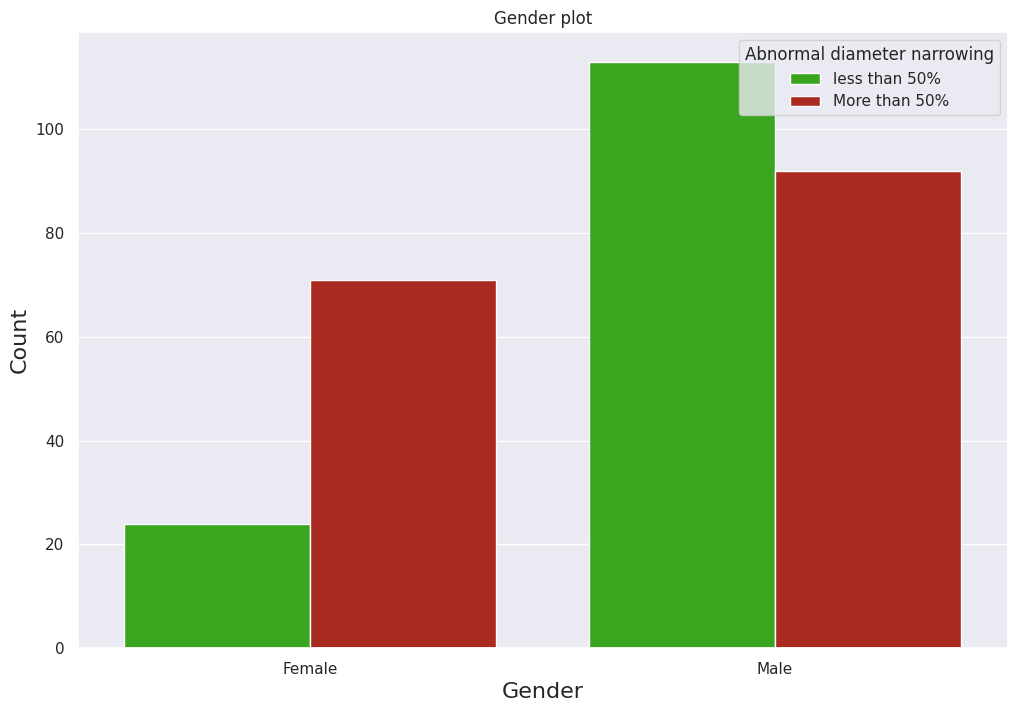

In [5]:
plt.figure(figsize=(12,8))
gender = sns.countplot(data = heart, x="sex",hue="output",palette=sns.color_palette([green, red]))
gender.set(xticklabels=["Female", "Male"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Gender plot")
plt.xlabel("Gender",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/Gender_plot.png")

The figure above could be misleading, because someone could think that male have higher probability to get an hearth attack respect to female.

However if we look at the proportions we have:

In [6]:
# 0 is for female and 1 is for male
female = heart.loc[heart.sex == 0]
male = heart.loc[heart.sex == 1]

# in position 0 we have how many DO NOT HAVE an heart attack, in position 1 the ones that HAVE an heart attack
female_heart = female.groupby(["output"])["output"].count()
male_heart = male.groupby(["output"])["output"].count()

In [7]:
print("Females:")
print("The total number of females in the dataset are: {total}".format(total = female_heart[0] + female_heart[1]))
print("We have {attack} females that HAVE an heart attack and {no_attack} that DO NOT".format(attack = female_heart[1], no_attack = female_heart[0]))
female_attack_proportion = round(female_heart[1]/(female_heart[0] + female_heart[1]),2)
print("This gives us the proportion of {attack_proportion}".format(attack_proportion = female_attack_proportion))
print("---------------------------------------------------------")
print("Males:")
print("The total number of males in the dataset are: {total}".format(total = male_heart[0] + male_heart[1]))
print("We have {attack} males that HAVE an heart attack and {no_attack} that DO NOT".format(attack = male_heart[1], no_attack = male_heart[0]))
male_attack_proportion = round(male_heart[1]/(male_heart[0] + male_heart[1]),2)
print("This gives us the proportion of {attack_proportion}".format(attack_proportion = male_attack_proportion))

Females:
The total number of females in the dataset are: 95
We have 71 females that HAVE an heart attack and 24 that DO NOT
This gives us the proportion of 0.75
---------------------------------------------------------
Males:
The total number of males in the dataset are: 205
We have 92 males that HAVE an heart attack and 113 that DO NOT
This gives us the proportion of 0.45


As we can see females have an higher chance of getting an heart attack.

However they are underrepresented in the dataset.

We can't see much from a plot but we have an idea of what is going on.

Since heart attack is known to be more common in male, they have higher chance of getting check, while female do not as we can see in this unbalanced dataset.

This is not the scope of the project, because we just want to make a classificator, however deeper analysis can and should be made.

From now on we will not distinguish between females and males during the visualizations and explanations.

#### Age

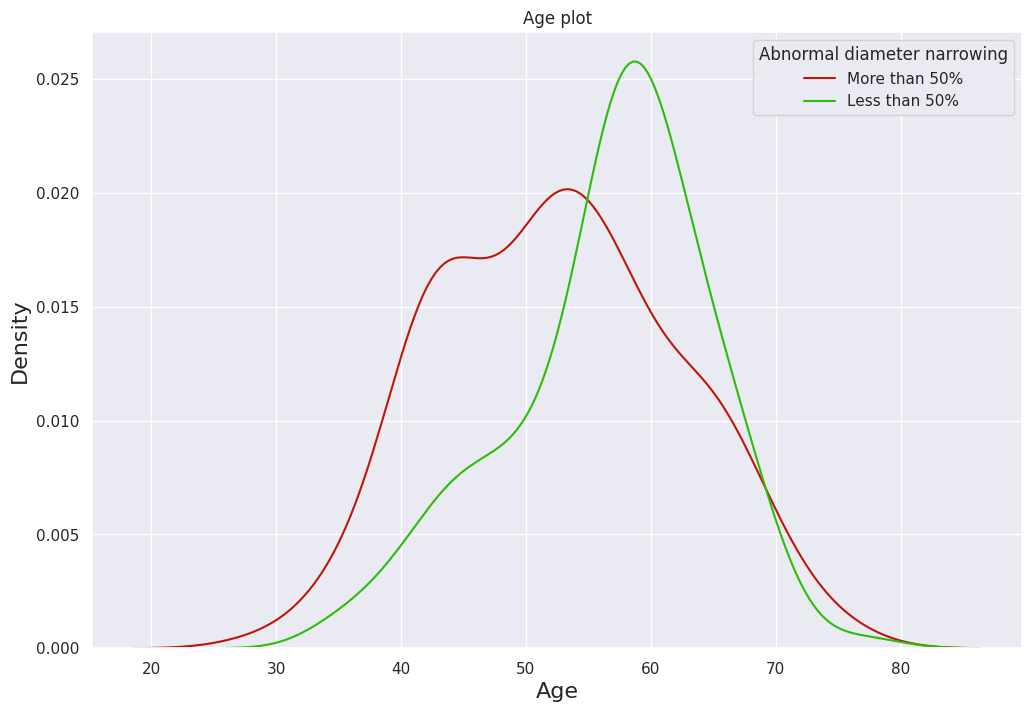

In [8]:
plt.figure(figsize=(12,8))
age = sns.kdeplot(data = heart, x="age",hue="output",palette=sns.color_palette([green, red]))
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['More than 50%','Less than 50%'])
plt.title("Age plot")
plt.xlabel("Age",size=16)
plt.ylabel("Density",size=16)
plt.savefig("Pictures/DataVisualization/Age_plot.png")

We can see that we have the majority of heart attacks between age 50 and 55. An explanation of the green peek starting at 50 years could be the checks that people usually do.

It's difficult to understand what's going on with just an attribute, but we can still make hypothesis.

#### Chest pain

Let's now examinate chest pain which is classified in:

0) asymptomatic
1) typical angina
2) atypical angina
3) non-anginal pain 

Angina is a type of chest pain caused by reduced blood flow to the heart and it is a symptom of coronary artery disease.

This could be a good indicator of heart attack.

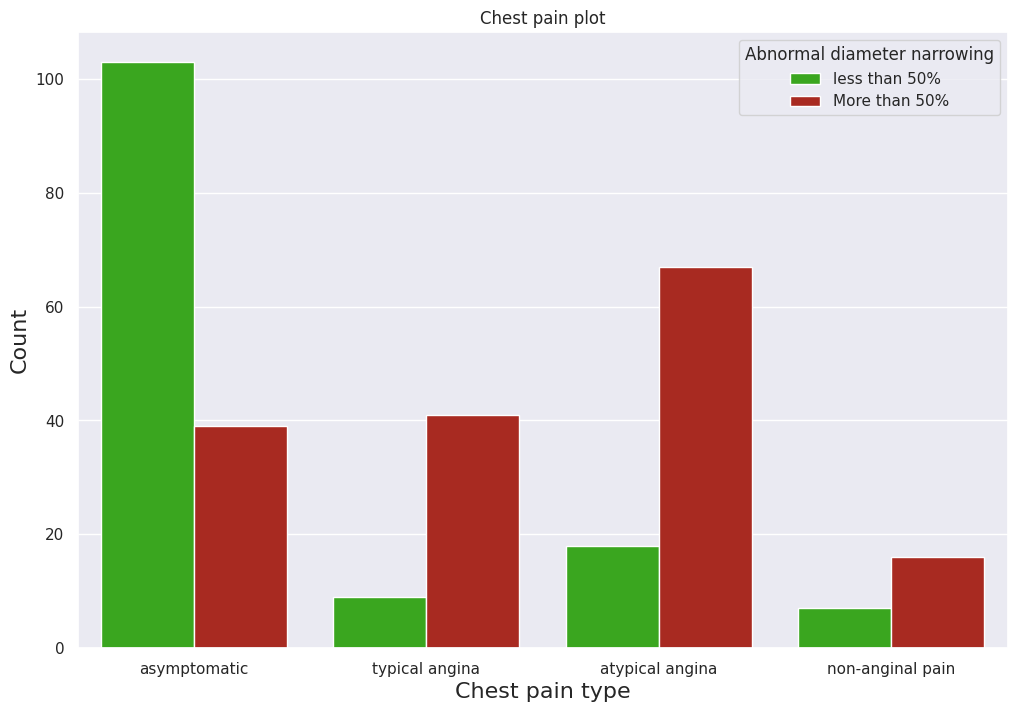

In [9]:
plt.figure(figsize=(12,8))
cp = sns.countplot(data = heart, x="cp",hue="output",palette=sns.color_palette([green, red]))
cp.set(xticklabels=["asymptomatic", "typical angina", "atypical angina", "non-anginal pain"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Chest pain plot")
plt.xlabel("Chest pain type",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/Chest_pain_plot.png")

As we expected the majority of heart attack are in individuals with angina.

The number of asymptomatic with heart attack is quite high and could need further analysis.

#### Resting systolic blood pressure

Now let's check the resting systolic blood pressure on admission to the hospital.

Values considered normal for a healthy pearson are 120/80 mmHg.

We are interested in th systolic value (120) which is the pressure at which the contracting heart pumps blood through the arteries.


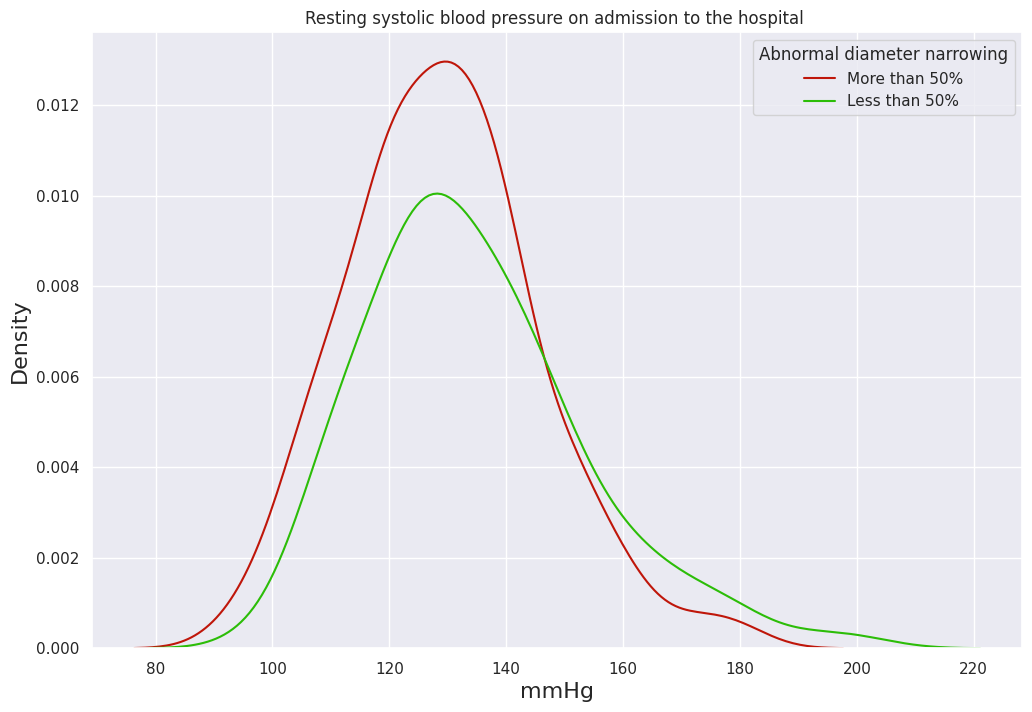

In [10]:
plt.figure(figsize=(12,8))
resting_blood_pressure = sns.kdeplot(data = heart, x="trtbps",hue="output",palette=sns.color_palette([green, red]))
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['More than 50%','Less than 50%'])
plt.title("Resting systolic blood pressure on admission to the hospital ")
plt.xlabel("mmHg",size=16)
plt.ylabel("Density",size=16)
plt.savefig("Pictures/DataVisualization/Resting_blood_pressure.png")

We notice a normal distribution.

Excluding the tails we can assert that the patients have arrived at the hospital with systolic pressure a little bit above the average.

However, we know that the subjects marked with Heart attack have their artery narrowed more than 50%, so the pressure is still very high for that diameter. (Need to check better if this is true). 

#### Cholesterol

The **serum cholesterol** level represents the amount of total cholesterol in the blood.

A person's serum cholesterol level comprises the amount of high-density lipoprotein (HDL), low-density lipoprotein (LDL), and triglycerides in the blood. Triglycerides are a type of fat bundled with cholesterol.

If it's too high, it can form plaques (literally "balls made of fat") in the arteries that block blood flow.

We can expect that it could be a good indicator for heart problems.

An healthy individual should have less than 200 mg/dL.
Borderline high is between 200 and 239 mg/dL.
Above 240 mg/dL is considered high.

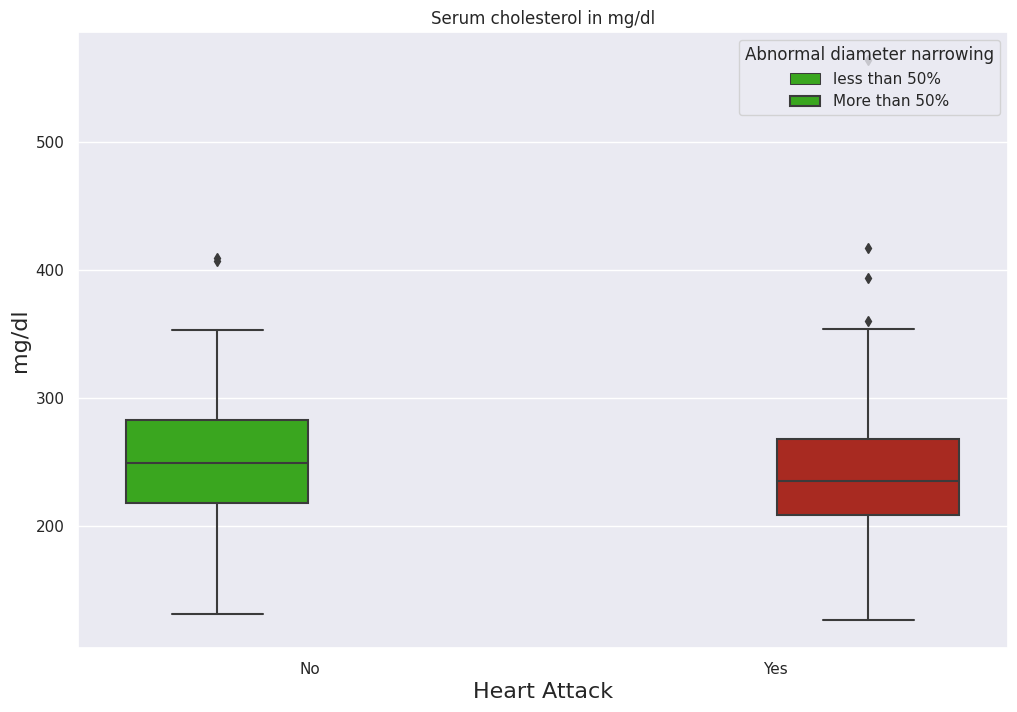

In [11]:
# I don't know why in the legend, the values are both green. The plot however is correct
plt.figure(figsize=(12,8))
cholesterol = sns.boxplot(data = heart, x="output", y = "chol",hue="output",palette=sns.color_palette([green, red]))
cholesterol.set(xticklabels=["No", "Yes"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Serum cholesterol in mg/dl")
plt.xlabel("Heart Attack",size=16)
plt.ylabel("mg/dl",size=16)
plt.savefig("Pictures/DataVisualization/Serum_cholesterol.png")

In [12]:
print("Descripting statistics to better understand the box plot of cholesterol")
print("--------------------------SERUM CHOLESTEROL----------------------------")
print(heart.groupby("output")["chol"].describe())
print("------------------------------------------------------------------------")
print("Where 0 is NO HEART ATTACK and 1 is HEART ATTACK")

Descripting statistics to better understand the box plot of cholesterol
--------------------------SERUM CHOLESTEROL----------------------------
        count        mean        std    min    25%    50%    75%    max
output                                                                 
0       137.0  251.430657  49.470400  131.0  218.0  249.0  283.0  409.0
1       163.0  242.803681  53.580199  126.0  208.5  235.0  267.5  564.0
------------------------------------------------------------------------
Where 0 is NO HEART ATTACK and 1 is HEART ATTACK


As we can see both have high level of cholesterol with similar mean and standard deviation.

After the first quartile all the values are considered high, however this discovery is misleading because it's seems that there is no correlation with having high level of cholesterol and heart attack.

#### Fasting blood sugar

This measures the blood sugar after an overnight fast (not eating).

A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates that patient have pre-diabetes, and 126 mg/dL or higher indicates diabetes.

In the dataset we know if the fasting sugar of the patient is above 120 mg/dL where we have 1 and 0 if it is below 120 mg/dL.

Essentially we know if a patient has diabetes or not.


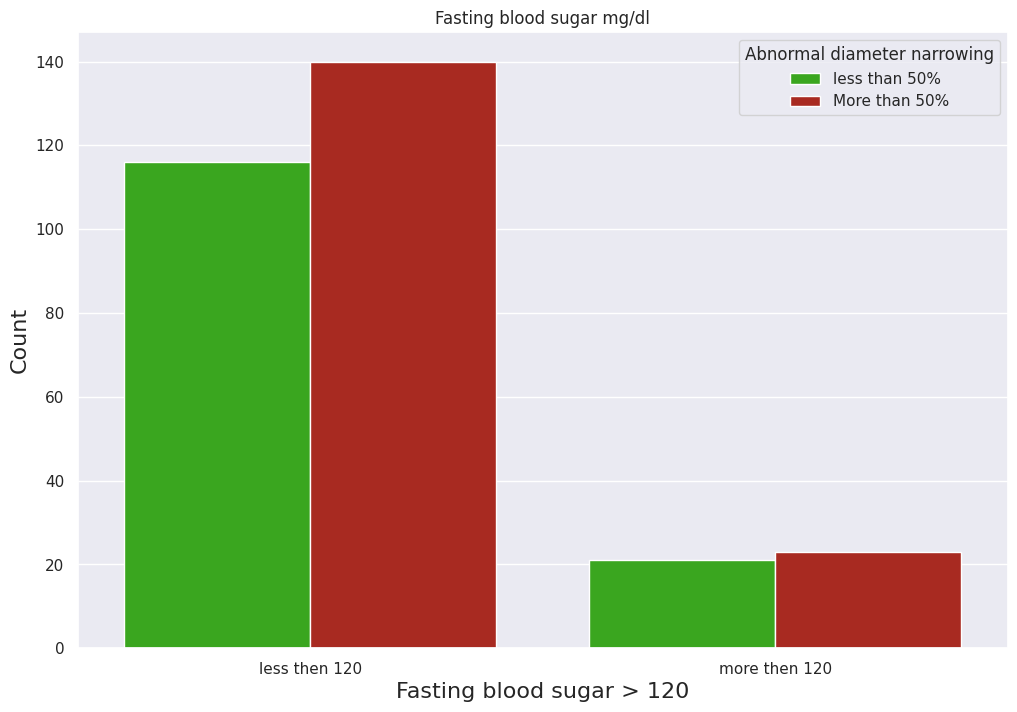

In [13]:
plt.figure(figsize=(12,8))
fbs = sns.countplot(data = heart, x="fbs",hue="output",palette=sns.color_palette([green, red]))
fbs.set(xticklabels=["less then 120", "more then 120"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Fasting blood sugar mg/dl")
plt.xlabel("Fasting blood sugar > 120",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/Fasting_blood_sugar.png")

We have really few individuals that have fasting blood sugar at more then 120 and it seems to be no relation between having diabetes and heart attack for what we can see in this dataset.

#### Resting ECG

An electrocardiogram (ECG) is a simple test that can be used to check a patient heart's rhythm and electrical activity.
In our dataset ECG results are classified as:

0) hypertrophy
1) normal
2) ST-T wave abnormality

The **ventricle hypertrophies** in response to pressure overload secondary to conditions such as aortic stenosis and hypertension.

**ST segment abnormalities** on the ECG can sometimes be due to a specific cause, such as ST segment elevation myocardial infarction, pericarditis or myocardial ischemia. Other times, there are just subtle abnormalities.

When the **ST segment** or **T wave** change could actually indicate a serius condition. From a medical point of view, these values are very important and should not be misinterpreted.


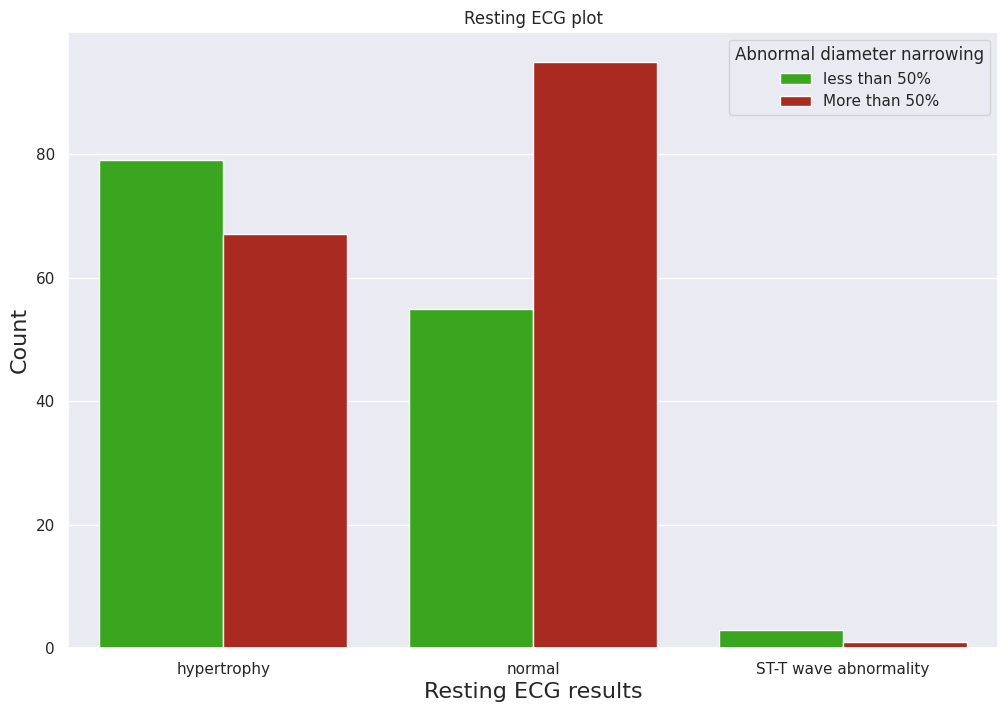

In [14]:
plt.figure(figsize=(12,8))
rest_ecg = sns.countplot(data = heart, x="restecg",hue="output",palette=sns.color_palette([green, red]))
rest_ecg.set(xticklabels=["hypertrophy", "normal", "ST-T wave abnormality"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Resting ECG plot")
plt.xlabel("Resting ECG results",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/Resting_ECG_plot.png")

It is interesting to notice that an abnormal ECG result is not a good indicator of an heart attack...for what we can see in the dataset.

#### Maximum BPM achieved

**BPM** (beat per minute) also known as **heart rate**, is the number of times the heart beats per minute.

A normal resting heart rate should be between 60 to 100 beats per minute, but it can vary from minute to minute.

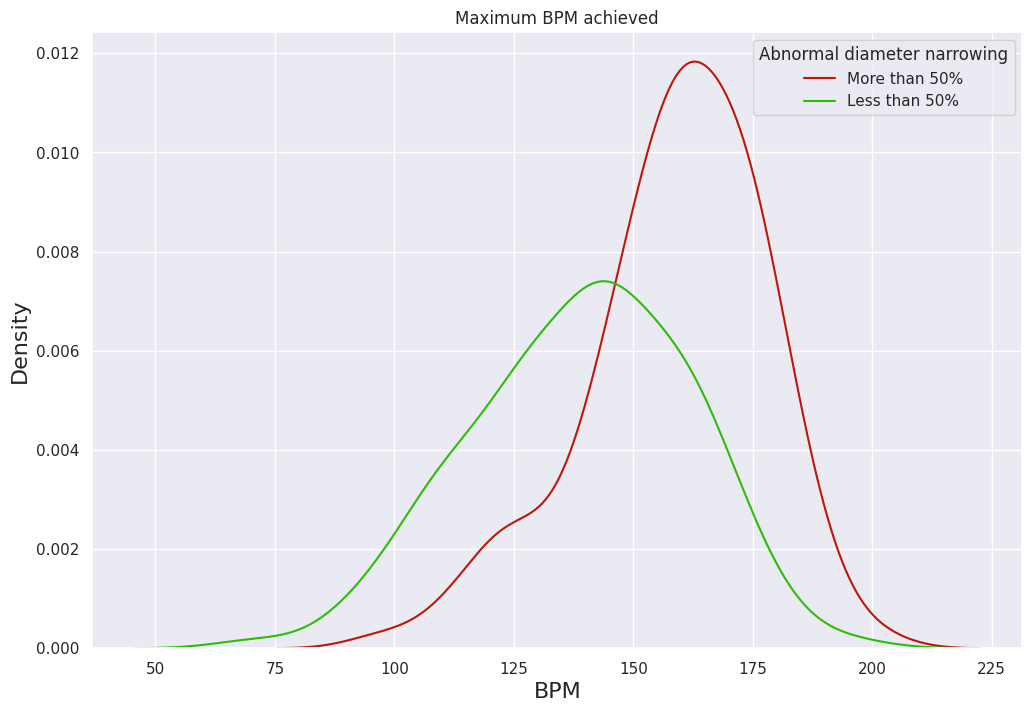

In [15]:
plt.figure(figsize=(12,8))
bpm = sns.kdeplot(data = heart, x="thalachh",hue="output",palette=sns.color_palette([green, red]))
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['More than 50%','Less than 50%'])
plt.title("Maximum BPM achieved")
plt.xlabel("BPM",size=16)
plt.ylabel("Density",size=16)
plt.savefig("Pictures/DataVisualization/Maximum_BPM_achieved.png")

We can clearly notice a high peak of heart attack in people with high BPM.

It's approximately a Gaussian distribution with low standard deviation and mean around 160 which is high.

The distribution of **no heart attack** has higher volatility and a smaller mean.

If we want to check better we can use descriptive statistics like we did in the cholesterol plot.

However, it's not a good classification attribute alone, for what we can see in the dataset.

In [16]:
print("Descriptive statistics to better understand kernel density of BPM")
print("--------------------------MAXIMUN BPM-----------------------------------")
print(heart.groupby("output")["thalachh"].describe())
print("------------------------------------------------------------------------")
print("Where 0 is NO HEART ATTACK and 1 is HEART ATTACK")

Descriptive statistics to better understand kernel density of BPM
--------------------------MAXIMUN BPM-----------------------------------
        count        mean        std   min    25%    50%    75%    max
output                                                                
0       137.0  138.978102  22.635042  71.0  125.0  142.0  156.0  195.0
1       163.0  158.644172  18.952403  96.0  149.0  161.0  172.0  202.0
------------------------------------------------------------------------
Where 0 is NO HEART ATTACK and 1 is HEART ATTACK


#### Exercise induce angina

Now we are checking if exercise induced angina in patients.

Like we said, **angina** is a type of chest pain caused by reduced blood flow to the heart and it is a symptom of coronary artery disease.

We are just interested in a yes or no respond without knowing the type of chest pain which we already analyzed. 

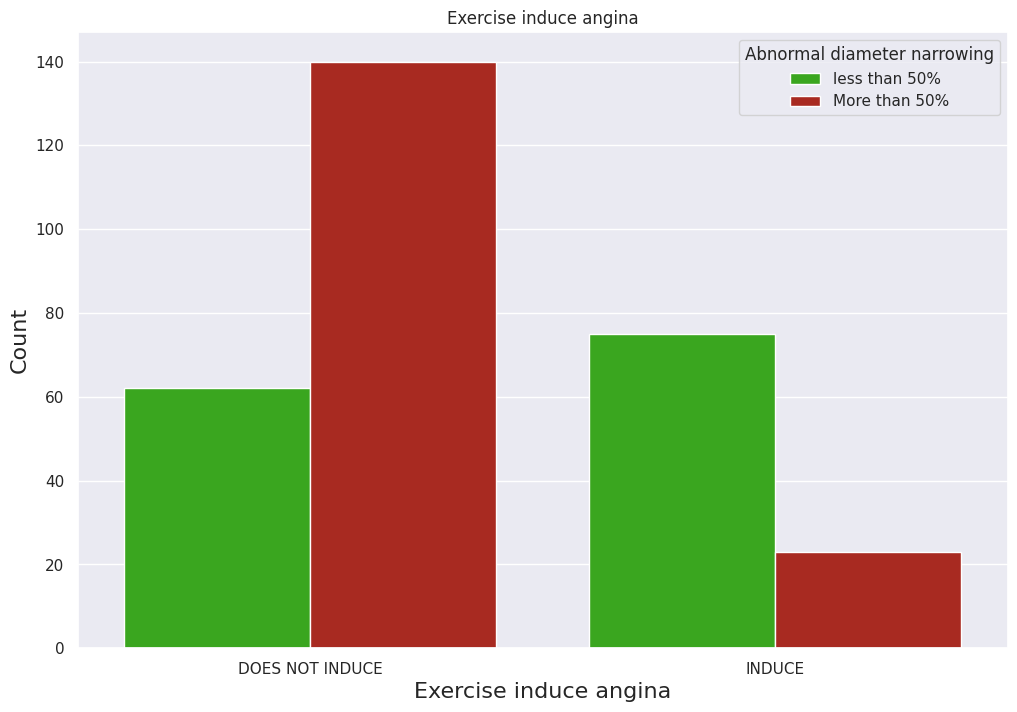

In [17]:
plt.figure(figsize=(12,8))
angina = sns.countplot(data = heart, x="exng",hue="output",palette=sns.color_palette([green, red]))
angina.set(xticklabels=["DOES NOT INDUCE","INDUCE"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Exercise induce angina")
plt.xlabel("Exercise induce angina",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/Exercise_induce_angina.png")

It's curious to notice that the majority of patients that had heart attack didn't have angina induced by exercise.

#### ST depression induced by exercise relative to rest

Exercise induced **ST segment depression** is considered a reliable ECG finding for the diagnosis of obstructive coronary atherosclerosis.

It has also been associated with a worse prognosis for patients with a documented **coronary artery disease**.

However, while the diagnostic and prognostic value of ST segment depression occurring during the active phase of exercise test is well recognized, only a few studies have investigated the clinical significance of ST segment depression appearing only during the recovery phase of exercise testing.

Essentially we have this type of data:

![ST segment depression](Pictures/README_Pictures/ST_depression_illustration.jpg)

We are checking that abnormal distance. Every square is 1mm.


In a typical angina, during exercise some cell may enter in a stress phase without dying and after the stress the ECG should be normal.

In an atypical angina we can still have an alterated ECG regardless of stress.

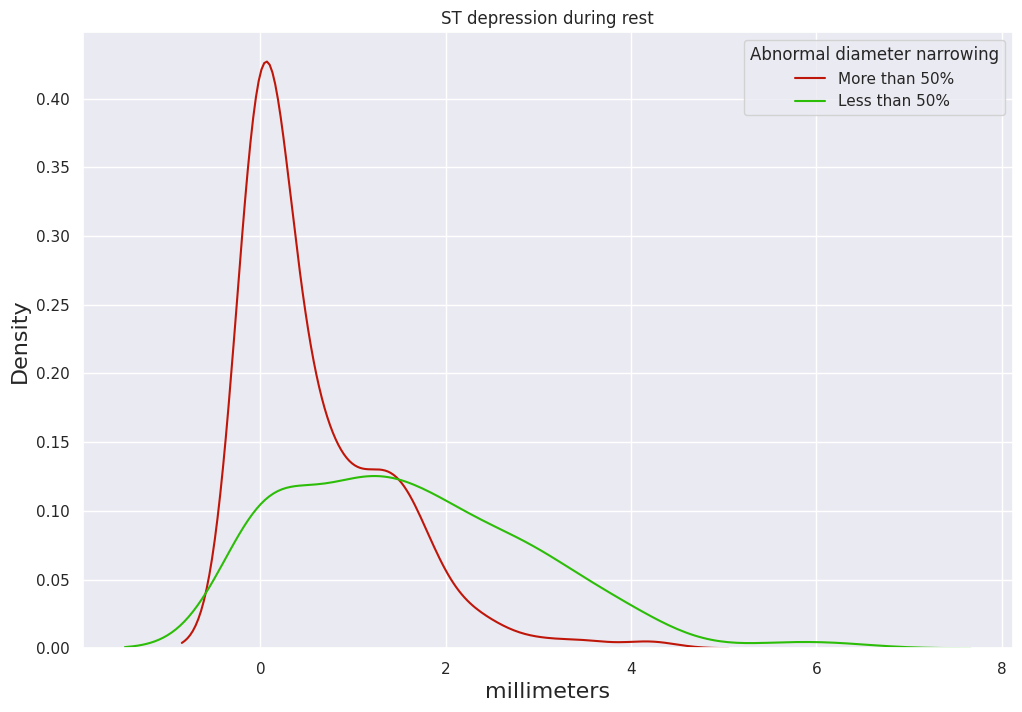

In [18]:
plt.figure(figsize=(12,8))
st = sns.kdeplot(data = heart, x="oldpeak",hue="output",palette=sns.color_palette([green, red]))
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['More than 50%','Less than 50%'])
plt.title("ST depression during rest")
plt.xlabel("millimeters",size=16)
plt.ylabel("Density",size=16)
plt.savefig("Pictures/DataVisualization/ST_depression_during_rest.png")

#### Slope of ST segment at peak exercise

We have the dataset divided in 3 type of slope:

0) downsloping
1) flat/horizontal
2) upsloping

**Horizontal** slope is very typical of ischemia.

![Horizontal](Pictures/README_Pictures/Horizontal_ST.png)

**Downsloping** is typical of ischemia.

![Downsloping](Pictures/README_Pictures/DownSloping_ST.png)

**Upsloping** of ST segment depression is a normal finding during physical exercise, and it should be considered normal if the T-waves are not inverted. Hyperventilation, however may cause similar ST segment depression.

![Upsloping](Pictures/README_Pictures/Upsloping_ST.png)

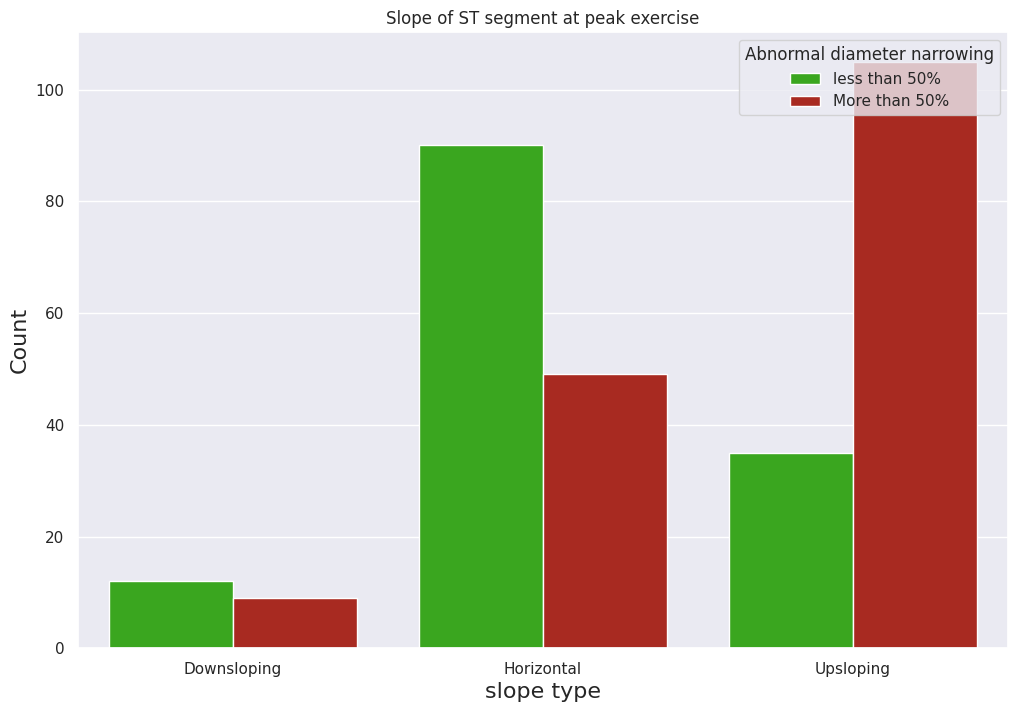

In [19]:
plt.figure(figsize=(12,8))
slope = sns.countplot(data = heart, x="slp",hue="output",palette=sns.color_palette([green, red]))
slope.set(xticklabels=["Downsloping", "Horizontal", "Upsloping"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Slope of ST segment at peak exercise")
plt.xlabel("slope type",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/ST_slope_peak.png")

#### Number of major vessels colored by fluoroscopy

Fluoroscopy is a medical procedure that makes a real-time video of the movements inside a part of the body by passing x-rays through the body over a period of time.

Coronary angiography is an example of a fluoroscopy procedure.

A small tube (catheter) is inserted into an artery of the heart. Contrast dye moves through the catheter into the blood vessels. The fluoroscopy shows how the blood moves through the vessels and allows the healthcare provider to locate any blockages.

Text(0, 0.5, 'Count')

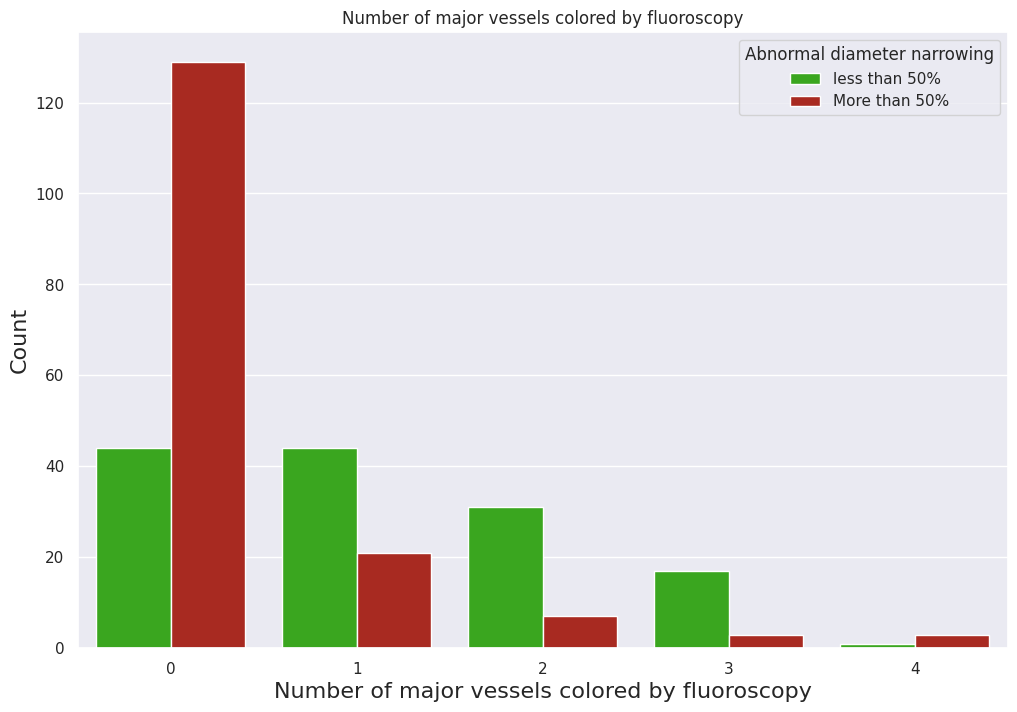

In [20]:
plt.figure(figsize=(12,8))
slope = sns.countplot(data = heart, x="caa",hue="output",palette=sns.color_palette([green, red]))
#slope.set(xticklabels=["Downsloping", "Horizontal", "Upsloping"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Number of major vessels colored by fluoroscopy")
plt.xlabel("Number of major vessels colored by fluoroscopy",size=16)
plt.ylabel("Count",size=16)

#TODO:
#Le coronarie principali sono 2...in tutto sono 7...qui ce ne sono 5 ma non so perchè e chi è chi...
#DA RIVEDERE!!!

#### Nuclear stress testing
Imaging the heart helps determine whether inducing stress caused detectable myocardial ischemia, which would then indicate a significant coronary stenosis.

The means to image the heart include electrocardiography (ECG stress testing), echocardiography, nuclear imaging and magnetic resonance imaging (MRI). 

Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells.

A camera (detector) is used afterwards to image the heart and compare segments.

A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a **reversible defect**.

Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a **fixed defect**.

We have data divided in:

1) fixed defect
2) normal
3) reversible defect



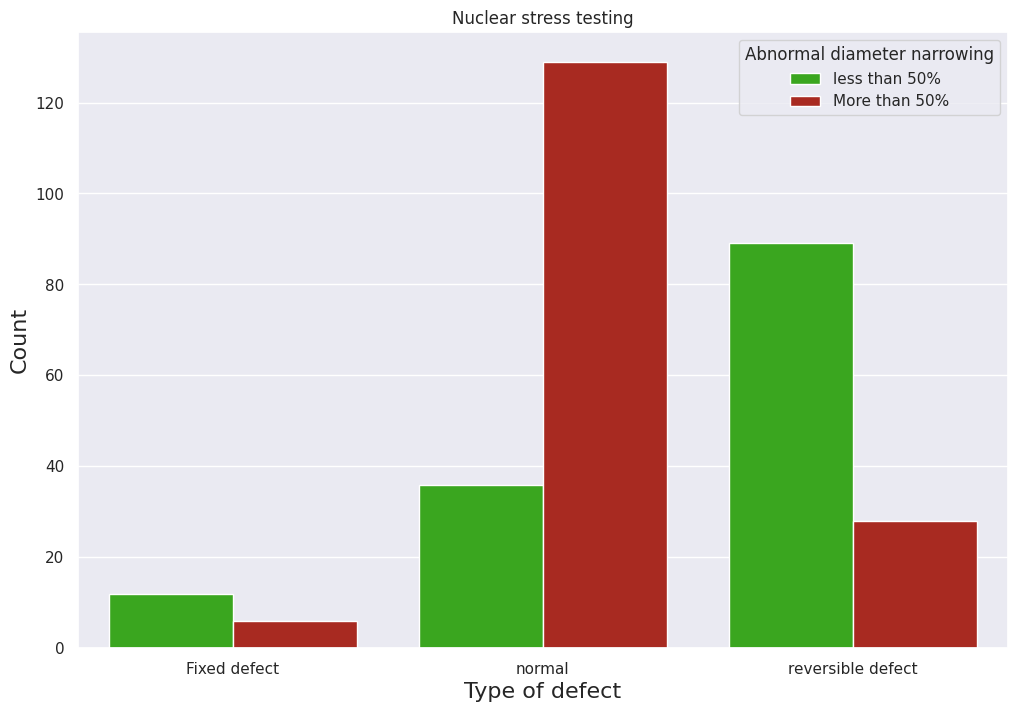

In [21]:
plt.figure(figsize=(12,8))
angina = sns.countplot(data = heart, x="thall",hue="output",palette=sns.color_palette([green, red]))
angina.set(xticklabels=["Fixed defect","normal","reversible defect"])
plt.legend(title='Abnormal diameter narrowing', loc='upper right', labels=['less than 50%', 'More than 50%'])
plt.title("Nuclear stress testing")
plt.xlabel("Type of defect",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualization/Nuclear_stress_testing.png")

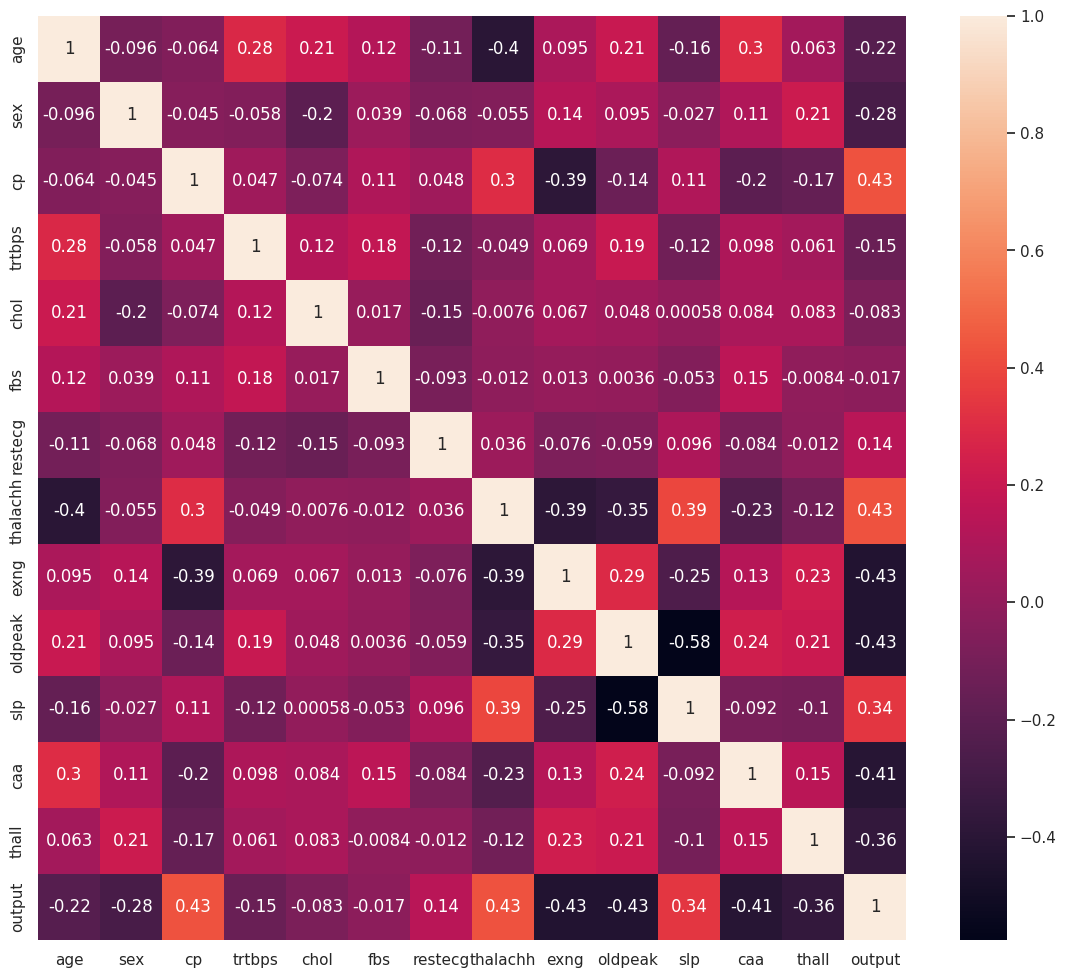

In [22]:
cor = heart.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True)
plt.savefig("Pictures/DataVisualization/Heat_map.png")

In [23]:
positive_threshold = 0.4
negative_threshold = -0.4
print("High correletion attributes with respect to Abnormal diameter narrowing")
print("------------------------------------------------------------------------")
for index,value in enumerate(cor.output):
    if (value > positive_threshold or value < negative_threshold) and not(value == 1):    
        print(cor.output.index[index],value)

High correletion attributes with respect to Abnormal diameter narrowing
------------------------------------------------------------------------
cp 0.42842647212212354
thalachh 0.4286828722453203
exng -0.4315746893308921
oldpeak -0.42856773959925343
caa -0.411488398879216


The high correlated values are
1) chest pain type  **positive correlated**
2) maximum heart rate achieved  **positive correlated** 
3) exercise induced angina  **negative correlated**
4) ST depression induced by exercise relative to rest  **negative correlated**
5) number of major vessels colored by fluoroscopy  **negative correlated**

Now that we have done an exploratory data analysis we can start building classification models, but first let's try to explain the data with a simple logistic model that it is not intended to predict future records.

## Logistic regression
Let's put all the columns in the model and the just use the "high correlation" value

In [24]:
x = heart.loc[:,heart.columns != "output"]
y = heart[['output']]
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())
print("AIC: {aic}\nBIC: {bic}".format(aic = log_reg.aic,bic = log_reg.bic))

Optimization terminated successfully.
         Current function value: 0.347955
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  300
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           12
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.4953
Time:                        10:05:14   Log-Likelihood:                -104.39
converged:                       True   LL-Null:                       -206.82
Covariance Type:            nonrobust   LLR p-value:                 3.235e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0175      0.019      0.903      0.367      -0.020       0.055
sex           -1.5617      0.

We see that the **coefficient of determination** is 0.49, so 49% of variance is explained by this model. However we have used all the columns and a lot of parameters are not statistically significant at $\alpha = 0.05$.
So we calculate the model again with just the correlated values.

In [25]:
x = heart[["cp","exng","oldpeak","slp","caa","thall"]]
y = heart[['output']]
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())
print("AIC: {aic}\nBIC: {bic}".format(aic = log_reg.aic,bic = log_reg.bic))

Optimization terminated successfully.
         Current function value: 0.407771
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  300
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.4085
Time:                        10:05:14   Log-Likelihood:                -122.33
converged:                       True   LL-Null:                       -206.82
Covariance Type:            nonrobust   LLR p-value:                 1.210e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cp             0.9104      0.166      5.484      0.000       0.585       1.236
exng          -0.9137      0.

The fit is a little bit worst however we can't compare models using the pseudo-$R^2$ because the models have a different number of parameters, so we must see the AIC or BIC criteria.
We choose to look the BIC criteria, since it prefers simpler model.
The second model is a bit better from this point of view.
We then build a third and last logistic model removing the non statistical significative parameters, so: cp and slp since their confidence interval include 0.

In [26]:
x = heart[["exng","oldpeak","caa","thall"]]
y = heart[['output']]
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())
print("AIC: {aic}\nBIC: {bic}".format(aic = log_reg.aic,bic = log_reg.bic))

Optimization terminated successfully.
         Current function value: 0.529838
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.2314
Time:                        10:05:14   Log-Likelihood:                -158.95
converged:                       True   LL-Null:                       -206.82
Covariance Type:            nonrobust   LLR p-value:                 1.287e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exng          -1.6124      0.317     -5.082      0.000      -2.234      -0.991
oldpeak       -0.5634      0.

Even though all parameters ar significant the model has the worst fit and can only explain 23% af the variance.
For now the best model is the second one.
Unfortunately we can get the same result by flipping a coin, so in the next section we will use 3 classification approaches that should perform better.

## Classification

We want to use and compare the following models:
1) Decision Tree
2) KNN
3) Naive Bayes

First thing first, we will import the necessary library and split the dataset in training set and test set

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
X = heart.drop("output",axis = 1)
y = heart.output
heart.reset_index(drop=True, inplace=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,shuffle=True, stratify=y)

In [29]:
key = ['KNeighborsClassifier','DecisionTreeClassifier',"NaiveBayes"]
value = [KNeighborsClassifier(), DecisionTreeClassifier(),GaussianNB()]
models = dict(zip(key,value))

In [30]:
predicted =[]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("-----------------Classification accuracy-----------------")
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print("Model: {name}, accuracy: {acc}".format(name=name,acc=round(acc,3)))
    print("Number of mislabeled values out of a total %d values : %d"% (X_test.shape[0], (y_test != predict).sum()))
    print("---------------------------------------------------------")

-----------------Classification accuracy-----------------
Model: KNeighborsClassifier, accuracy: 0.656
Number of mislabeled values out of a total 90 values : 31
---------------------------------------------------------
Model: DecisionTreeClassifier, accuracy: 0.778
Number of mislabeled values out of a total 90 values : 20
---------------------------------------------------------
Model: NaiveBayes, accuracy: 0.889
Number of mislabeled values out of a total 90 values : 10
---------------------------------------------------------


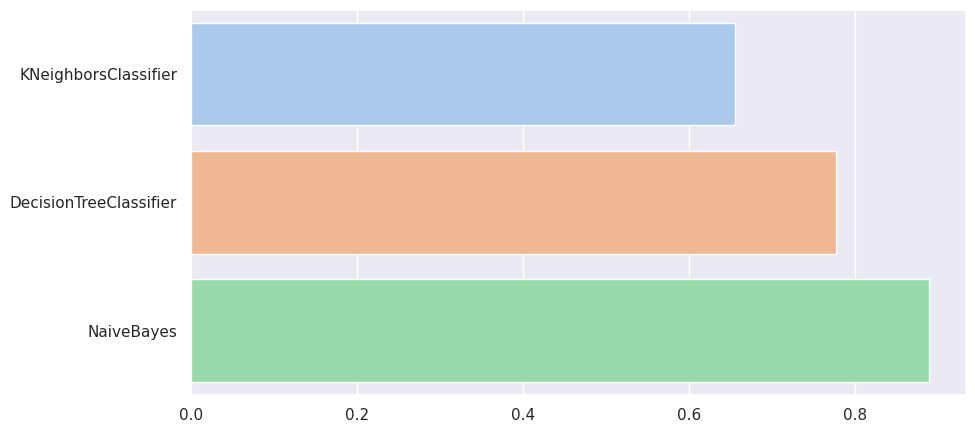

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')
plt.savefig("Pictures/DataVisualization/Model_Comparison.png")